## 第七次练习

+ 请务必交到exer7文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请在12月20日前提交。

请写一下姓名和学号：
+ 姓名  孟媛
+ 学号  0165339

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.head()

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


In [ ]:
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.head()


下面的图都至少需要在图上标注：
+ 图标题
+ x轴标题
+ y轴标题
+ 适当修改x轴或者y轴的刻度及标签，使之清晰美观
+ 根据需要添加图例

### 散点图
反映期中考试标准化成绩语文（stdchn）和期中考试标准化成绩数学（stdmat）的相关关系

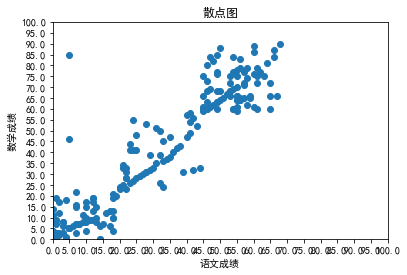

In [8]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

xminorLocator   = MultipleLocator(5) #将x主刻度标签设置为5的倍数
xminorFormatter = FormatStrFormatter('%1.1f') #设置x轴标签文本的格式

ymajorLocator   = MultipleLocator(5) #将y轴主刻度标签设置为5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') #设置y轴标签文本的格式

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_title("散点图", fontdict=None, loc='center')
ax1.set_xlabel('语文成绩')
ax1.set_ylabel('数学成绩')
x=df.stdchn[:200]
y=df.stdmat[:200]
ax1.xaxis.set_major_locator(xminorLocator )
ax1.xaxis.set_major_formatter(xminorFormatter)

ax1.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)
ax1.set_xlim(0,100)
ax1.set_ylim(0,100)

plt.scatter(x,y)
plt.show()

### 饼图
对问题“你是独生子女吗”(b01)的回答有“是”和“否”两种回答，相应的数字分别是1和2。请画一个饼图反映二者的比例。

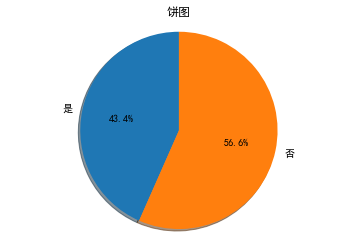

In [10]:
sum(df.b01==1)+sum(df.b01==2)
labels = '是', '否'
x=sum(df.b01==1)/(sum(df.b01==1)+sum(df.b01==2))
y=sum(df.b01==2)/(sum(df.b01==1)+sum(df.b01==2))
sizes = [x,y]
fig2, ax2 = plt.subplots()
ax2.set_title("饼图", fontdict=None, loc='center')
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal') 
plt.show()

### 直方图
反映变量“每天晚上睡多长时间-小时”(b18a)的分布情况。

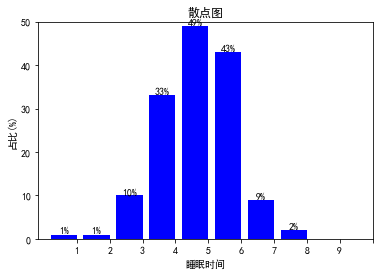

In [21]:
x1=df['b18a']
x1=x1[:300]
name_list = ['1', '2', '3', '4','5','6','7','8','9']
num_list = [1,1,10,33,49,43,9,2]
rects=plt.bar(range(len(num_list)), num_list, color='b')
index=[0,1,2,3,4,5,6,7,8,9]
index=[float(c)+0.4 for c in index]
plt.ylim(ymax=50, ymin=0)
plt.xticks(index, name_list)
plt.ylabel("占比(%)") 
plt.xlabel("睡眠时间")
plt.title("直方图", fontdict=None, loc='center')
for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, str(height)+'%', ha='center', va='bottom')
plt.show()

### 柱图
反映变量"你妈妈是做什么工作的"(b08a)的职业分布情况，数字和编码关系如下：

+ 1	国家机关事业单位领导与工作人员
+ 2	企业/公司中高级管理人员
+ 3	教师、工程师、医生、律师
+ 4	技术工人（包括司机）
+ 5	生产与制造业一般职工
+ 6	商业与服务业一般职工
+ 7	个体户
+ 8	农民
+ 9 无业、失业、下岗


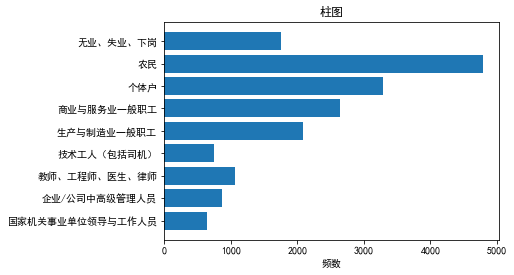

In [23]:
x1=sum(df.b08a=='1')
x2=sum(df.b08a=='2')
x3=sum(df.b08a=='3')
x4=sum(df.b08a=='4')
x5=sum(df.b08a=='5')
x6=sum(df.b08a=='6')
x7=sum(df.b08a=='7')
x8=sum(df.b08a=='8')
x9=sum(df.b08a=='9')
name_list=['国家机关事业单位领导与工作人员','企业/公司中高级管理人员',
'教师、工程师、医生、律师','技术工人（包括司机）','生产与制造业一般职工',
'商业与服务业一般职工','个体户','农民','无业、失业、下岗']
num_list=[x1,x2,x3,x4,x5,x6,x7,x8,x9]
plt.barh(range(len(num_list)),num_list,tick_label=name_list)

plt.xlabel('频数')
plt.title("柱图")
plt.show()